In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.image import pad_to_bounding_box
from tensorflow.image import central_crop
from tensorflow.image import resize

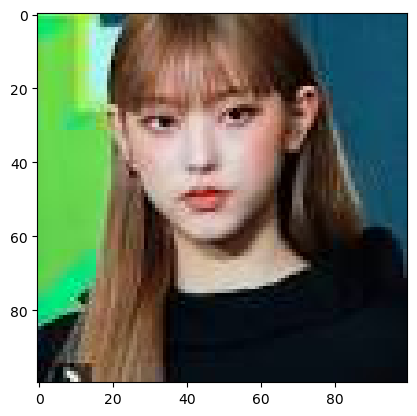

In [7]:
#이미지 불러오기
bgd = image.load_img('./train/train_1/4.jpg')
bgd_vector = np.asarray(image.img_to_array(bgd))
bgd_vector = bgd_vector/255
 
#이미지 형태 확인 
bgd_vector.shape
 
#이미지 확인 
plt.imshow(bgd_vector)
plt.show()

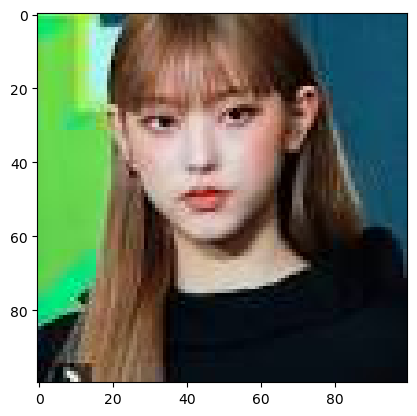

In [8]:
#이미지의 변경할 크기 설정 
target_height = 100
target_width = 100
 
#현재 이미지의 크기 지정 
source_height = bgd_vector.shape[0]
source_width = bgd_vector.shape[1]
 
#padding 실시 : pad_to_bounding_box 사용 
bgd_vector_pad = pad_to_bounding_box(bgd_vector, 
                                     int((target_height-source_height)/2), 
                                     int((target_width-source_width)/2), 
                                     target_height, 
                                     target_width)
                                     
 #이미지 형태 확인 
bgd_vector_pad.shape
 
#이미지 확인 
plt.imshow(bgd_vector_pad)
plt.show()
 



In [9]:
from tensorflow.keras.applications.vgg16 import VGG16
 
#weight, include_top 파라미터 설정 
model = VGG16(weights='imagenet', include_top=True)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

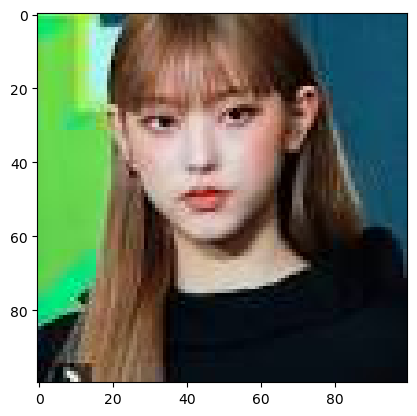

In [11]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
 
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np
#from google.colab import drive
#drive.mount('/content/gdrive')
 
 
img = Image.open('./train/train_1/4.jpg')
img.size
plt.imshow(np.asarray(img))

100 100 0 0 100


(100, 100)

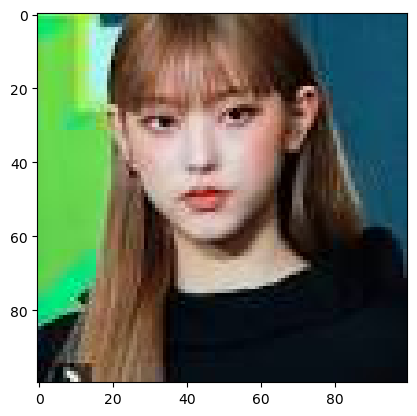

In [12]:
w, h = img.size
s = min(w, h)
y = (h - s) // 2
x = (w - s) // 2
 
print(w, h, x, y, s)
img = img.crop((x, y, x+s, y+s))
# 4-tuple defining the left, upper, right, and lower pixel coordinate
plt.imshow(np.asarray(img))
img.size

(224, 224)

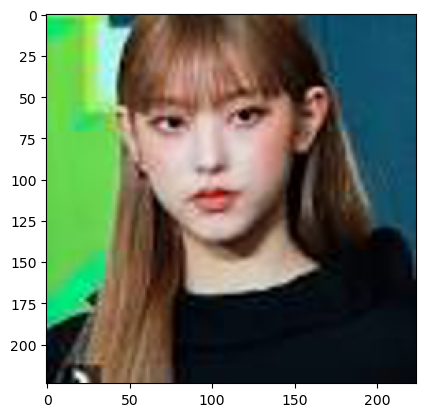

In [13]:
#VGG16이 입력받는 이미지크기 확인
model.layers[0].input_shape
 
#이미지 리사이즈
target_size = 224
img = img.resize((target_size, target_size)) # resize from 280x280 to 224x224
plt.imshow(np.asarray(img))
 
img.size #변경된 크기 확인

In [14]:
#numpy array로 변경
np_img = image.img_to_array(img)
np_img.shape  #(224, 224, 3) 
 
#4차원으로 변경 
img_batch = np.expand_dims(np_img, axis=0)
img_batch.shape

(1, 224, 224, 3)

In [16]:
#feature normalization
pre_processed = preprocess_input(img_batch)


In [17]:
img_batch

array([[[[ -31.68    ,  138.22101 ,   15.060997],
         [ -31.68    ,  138.22101 ,   17.060997],
         [ -29.68    ,  138.22101 ,   22.060997],
         ...,
         [-109.68    ,  -36.779   ,    2.060997],
         [-109.68    ,  -36.779   ,    2.060997],
         [-109.68    ,  -36.779   ,    2.060997]],

        [[ -40.68    ,  135.22101 ,    9.060997],
         [ -40.68    ,  135.22101 ,   11.060997],
         [ -38.68    ,  135.22101 ,   16.060997],
         ...,
         [-109.68    ,  -36.779   ,    2.060997],
         [-109.68    ,  -36.779   ,    2.060997],
         [-109.68    ,  -36.779   ,    2.060997]],

        [[ -60.68    ,  122.221   ,   -4.939003],
         [ -60.68    ,  122.221   ,   -2.939003],
         [ -58.68    ,  122.221   ,    2.060997],
         ...,
         [-107.68    ,  -34.779   ,    4.060997],
         [-108.68    ,  -35.779   ,    3.060997],
         [-108.68    ,  -35.779   ,    3.060997]],

        ...,

        [[-115.68    , -108.779   ,  -

In [18]:
pre_processed

array([[[[  15.060997,  138.22101 ,  -31.68    ],
         [  17.060997,  138.22101 ,  -31.68    ],
         [  22.060997,  138.22101 ,  -29.68    ],
         ...,
         [   2.060997,  -36.779   , -109.68    ],
         [   2.060997,  -36.779   , -109.68    ],
         [   2.060997,  -36.779   , -109.68    ]],

        [[   9.060997,  135.22101 ,  -40.68    ],
         [  11.060997,  135.22101 ,  -40.68    ],
         [  16.060997,  135.22101 ,  -38.68    ],
         ...,
         [   2.060997,  -36.779   , -109.68    ],
         [   2.060997,  -36.779   , -109.68    ],
         [   2.060997,  -36.779   , -109.68    ]],

        [[  -4.939003,  122.221   ,  -60.68    ],
         [  -2.939003,  122.221   ,  -60.68    ],
         [   2.060997,  122.221   ,  -58.68    ],
         ...,
         [   4.060997,  -34.779   , -107.68    ],
         [   3.060997,  -35.779   , -108.68    ],
         [   3.060997,  -35.779   , -108.68    ]],

        ...,

        [[ -90.939   , -108.779   , -1

In [19]:
y_preds = model.predict(pre_processed)
 
y_preds.shape  # 종속변수가 취할 수 있는 값의 수 = 1000
 
np.set_printoptions(suppress=True, precision=10)
y_preds
 
#가장 확률이 높은 값
np.max(y_preds)

1/1 [==============================] - 1s 605ms/step


0.121671475

In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import math
import numpy as np
 

TRAIN_DATA_DIR = './train'
VALIDATION_DATA_DIR = './validation'
TEST_DATA_DIR = './test'
 
TRAIN_SAMPLES = 800*2
VALIDATION_SAMPLES = 400*2 
NUM_CLASSES = 2
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 64

In [27]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2)
 
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [28]:
train_generator = train_datagen.flow_from_directory(TRAIN_DATA_DIR,
                                                    target_size=(IMG_WIDTH,
                                                                 IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE,
                                                    shuffle=True,
                                                    seed=12345,
                                                    class_mode='categorical')
 
validation_generator = val_datagen.flow_from_directory(
    VALIDATION_DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode='categorical')

Found 125 images belonging to 1 classes.
Found 65 images belonging to 1 classes.


In [29]:
def model_maker():
    base_model = VGG16(include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    print(len(base_model.layers))
 
    for layer in base_model.layers[:]:
        layer.trainable = False
 
    input = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    custom_model = base_model(input)
    custom_model = GlobalAveragePooling2D()(custom_model)
    custom_model = Dense(32, activation='relu')(custom_model)
    predictions = Dense(NUM_CLASSES, activation='softmax')(custom_model)
    
    return Model(inputs=input, outputs=predictions)
model_final = model_maker()
model_final.summary()

19
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 32)                16416     
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 14,731,170
Trainable params: 16,482
Non-trainable params: 14,714,688
_________________________________________

In [30]:
model_final.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['acc'])
 
history = model_final.fit(
    train_generator,
    steps_per_epoch=TRAIN_SAMPLES // BATCH_SIZE, # number of updates
    epochs=10,
    validation_data=validation_generator,
    validation_steps=VALIDATION_SAMPLES // BATCH_SIZE)


Epoch 1/10
25/25 [==============================] - 46s 1s/step - loss: 3.6267 - acc: 0.3040 - val_loss: 3.9860 - val_acc: 0.6462


In [32]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
 
test_generator = val_datagen.flow_from_directory(
    TEST_DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode='categorical')

Found 29 images belonging to 1 classes.


In [33]:
model_final.evaluate(test_generator, steps=800 // BATCH_SIZE)


12/12 [==============================] - 6s 3ms/step - loss: 3.8646 - acc: 0.6207


[3.8645691871643066, 0.6206896305084229]

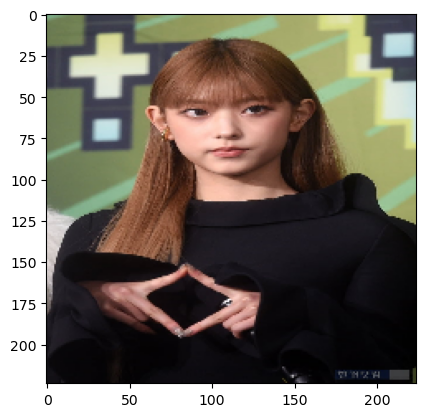

In [34]:
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
 
img_path = './test.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
plt.imshow(img_array/255)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = expanded_img_array / 255

In [35]:
prediction = model_final.predict(preprocessed_img)
print(np.array(prediction[0]))

1/1 [==============================] - 0s 394ms/step
[0.51504177 0.48495817]
